In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Value of data pair (X,Y) [variance of both assumed to be unity]:
X=10  # Called $\hat x$ in lectures.
Y=15  # Called $\hat y$ in lectures.

# Number of Gibbs samples:
nsamples = 10000
m = np.empty(nsamples)
x = np.empty(nsamples)
colour = np.empty(nsamples)

# Starting point in parameter space (m=slope parameter; x=latent variable):
m[0]=0.5
x[0]=6

# Draw Gibbs samples from m and x. (I should really reverse the order of m,x each time
# to ensure detailed balance).  Colour points according to ln(likelihood):

for i in range(1,nsamples):

# Randomise the order of sampling (for detailed balance):

    if(np.random.uniform()<0.5):
      m[i] = np.random.normal(Y/x[i-1],1/x[i-1]);
      x[i] = np.random.normal((X+Y*m[i])/(1+m[i]**2),1/np.sqrt(1+m[i]**2));
    else:
      x[i] = np.random.normal((X+Y*m[i-1])/(1+m[i-1]**2),1/np.sqrt(1+m[i-1]**2)); 
      m[i] = np.random.normal(Y/x[i],1/x[i]);
    colour[i] = (X-x[i])**2+(Y-m[i]*x[i])**2

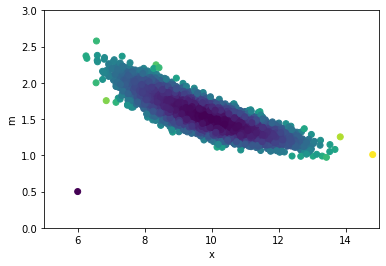

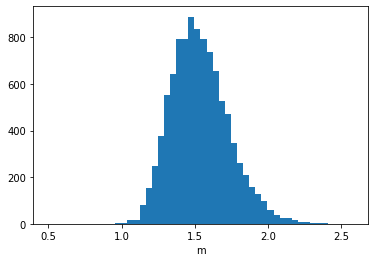

In [3]:
# Scatter plot of the samples:
plt.scatter(x, m, c = colour)
plt.xlim(5,15)
plt.ylim(0,3)
plt.xlabel('x')
plt.ylabel('m')
plt.show() 

# Histogram of the samples of the slope (true value is 1.5):
plt.hist(m,bins=50)
plt.xlabel('m')
plt.show()